This example firstly set up a physical background condition with Jupiter and Saturn orbiting around the Sun.

Then we add 20 massless test particles with several initial status according to the hypothesis.

After that we integrate the system for 100 time units.

In [1]:
import rebound

In [2]:
sim = rebound.Simulation()

In [3]:
sim.add(hash="sun", m=1.)
sim.add(hash="jupiter", m=0.0009547919152112404, a=3.5)
sim.add(hash="saturn", m=0.0002858856727222417, a=4.58)

In [4]:
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = 0.05

In [5]:
sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Feb 17 2022 11:12:39
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.050000
---------------------------------
<rebound.particle.Particle object at 0x7fa68a3a8620, m=1.0 x=-0.004646317955101027 y=0.0 z=0.0 vx=0.0 vy=-0.0006436170883978178 vz=0.0>
<rebound.particle.Particle object at 0x7fa68a3b5c80, m=0.0009547919152112404 x=3.495353682044899 y=0.0 z=0.0 vx=0.0 vy=0.5341339847278582 vz=0.0>
<rebound.particle.Particle object at 0x7fa68a3a8620, m=0.0002858856727222417 x=4.5786922660950795 y=0.0 z=0.0 vx=0.0 vy=0.4674255861360561 vz=0.0>
---------------------------------


In [6]:
import numpy as np
N_testparticle = 20
a_initial = np.linspace(5, 5.5, N_testparticle)

for a in a_initial:
    sim.add(a=a, e=np.random.rand()*1e-2, inc=np.random.rand()*1e-2, omega=np.random.rand()*2.*np.pi, Omega=np.random.rand()*2.*np.pi)

In [7]:
sim.N_active = 3

In [8]:
sim.integrate(100)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ub9p2hk1 because the default path (/home/fowdef/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


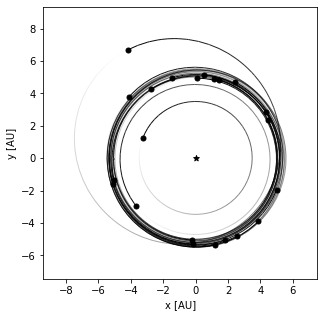

In [9]:
# 输出图像
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")